In [1]:
# run at startup
library(ggplot2)
library(dplyr)
library(ggbeeswarm)
library(reshape2)

options(scipen=999)
options(jupyter.plot_mimetypes = "image/svg+xml") 


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
per_genome_counts <- read.table("ym/counts_per_genome_by_svtype",header=F)

In [3]:
colnames(per_genome_counts) <- c("sample","ALL","INS","DEL","INV")

In [4]:
head(per_genome_counts)

,sample,ALL,INS,DEL,INV
,<int>,<int>,<int>,<int>,<int>
1,1000151,26133,15515,10580,38
2,1000513,24897,14711,10161,25
3,1000920,25852,15511,10303,38
4,1001399,26175,15674,10463,38
5,1001980,24778,14855,9890,33
6,1002322,26214,15603,10579,32


In [5]:
per_genome_counts.melted <- melt(per_genome_counts, id=c("sample"))
colnames(per_genome_counts.melted) <- c("sample","SVtype","count")

In [24]:
head(per_genome_counts.melted)

,sample,SVtype,count
,<chr>,<fct>,<int>
1,1000151,ALL,180
2,1000513,ALL,175
3,1000920,ALL,181
4,1001399,ALL,186
5,1001980,ALL,150
6,1002322,ALL,187


Saving 6.67 x 6.67 in image


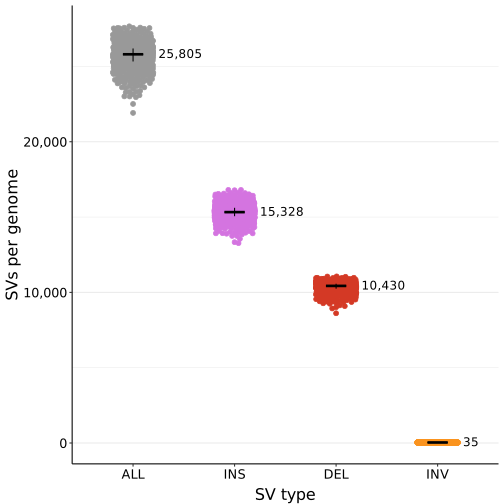

In [41]:
# Plot num SVs per sample as 'beeswarm'
plot_SVs_per_sample_beeswarm <- function(stats) {
  require(ggplot2)
  require(ggbeeswarm)
   
  ggplot(stats, aes(x=SVtype, y=count)) + 
    geom_beeswarm(corral = "random", corral.width=0.4, method='compactswarm',
              priority='density', size=2, aes(color=SVtype)) +
    scale_y_continuous(labels = scales::comma, limits = c(0, max(stats$count))) + 
    theme_bw() + 
    theme(text = element_text(size = 16),
          panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), 
          panel.border = element_blank(), 
          axis.line = element_line(color = 'black'), 
          axis.title.x = element_text(vjust=-0.5),
          axis.text=element_text(color="black"),
          legend.position="none") +
    scale_color_manual(name="SV type",
                     values=c("ALL"="grey60","INS"="#d474e0","DEL"="#d43925","INV"="#fa931e"),
                     breaks=c("ALL","INS","DEL","INV")) +
    stat_summary(fun = median, fun.min = median, fun.max = median,
                 geom = "crossbar", width = 0.2, col='black') +
    stat_summary(fun = median, geom = "text", hjust = 0, size=12/.pt, 
                 aes(label=scales::comma(after_stat(y))), 
                 position = position_nudge(x = 0.25)) + 
    stat_summary(fun = median, fun.min = function(x){quantile(x,probs=0.25)}, fun.max = function(x){quantile(x,probs=0.75)},
                 geom = "linerange", col='black') +
  #  geom_text(aes(caller, label=caller, y=33000),data=group_labels) +
#    guides(color = guide_legend(override.aes = list(size = 6))) +
    ylab("SVs per genome") + xlab("SV type")
    # + scale_x_discrete(labels=c("pbsv","Sniffles2","PAV","GATK-SV (srGS)"))
}

plot_SVs_per_sample_beeswarm(per_genome_counts.melted)
ggsave("ym/AoU_TPR09_SV_counts_per_sample.png")

In [38]:
count_by_svtype <- read.table("ym/tpr07_whole_cohort_count_by_svtype")
count_by_svtype_T2T <- read.table("ym/tpr07_T2T_whole_cohort_count_by_svtype")

In [37]:
count_by_svtype.09 <- count_by_svtype
count_by_svtype_T2T.09 <- count_by_svtype_T2T

In [39]:
colnames(count_by_svtype) <- c("SVtype","count")
colnames(count_by_svtype_T2T) <- c("SVtype","count")


In [40]:
count_by_svtype<-rbind(count_by_svtype, data.frame("SVtype"="ALL","count"=sum(count_by_svtype$count)))
count_by_svtype_T2T<-rbind(count_by_svtype_T2T, data.frame("SVtype"="ALL","count"=sum(count_by_svtype_T2T$count)))

In [41]:
count_by_svtype$SVtype <- c("DEL","INS","INV","ALL")
count_by_svtype_T2T$SVtype <- c("DEL","INS","INV","ALL")
count_by_svtype$SVtype <- factor(count_by_svtype$SVtype,levels=c("ALL","INS","DEL","INV"))
count_by_svtype_T2T$SVtype <- factor(count_by_svtype_T2T$SVtype,levels=c("ALL","INS","DEL","INV"))

head(count_by_svtype)
head(count_by_svtype_T2T)

,SVtype,count
,<fct>,<int>
1,DEL,166597
2,INS,499272
3,INV,401
4,ALL,666270


,SVtype,count
,<fct>,<int>
1,DEL,341572
2,INS,567216
3,INV,460
4,ALL,909248


Saving 6.67 x 6.67 in image


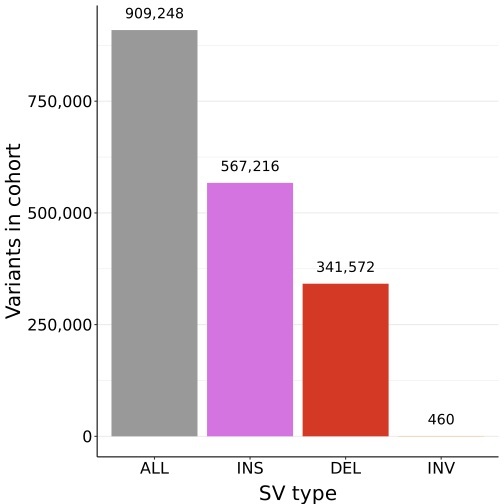

In [43]:
ggplot(count_by_svtype_T2T, aes(x=SVtype,y=count,fill=SVtype)) + geom_bar(stat="identity") + 
    theme_bw() +
    scale_fill_manual(name="SV type",
                     values=c("ALL"="grey60","INS"="#d474e0","DEL"="#d43925","INV"="#fa931e"),
                     breaks=c("ALL","INS","DEL","INV")) +
    theme(text = element_text(size = 20),
          panel.grid.major.x = element_blank(), panel.grid.minor.x = element_blank(), 
          panel.border = element_blank(), 
          axis.line = element_line(color = 'black'), 
          axis.title.x = element_text(vjust=-0.5),
          axis.text=element_text(color="black"),
          legend.position="none") +
    xlab("SV type") + ylab("Variants in cohort") +
    geom_text(aes(label = scales::comma(count)), vjust=-1, size=5) +
    scale_y_continuous(labels = scales::comma, limits=c(0,max(count_by_svtype_T2T$count)*1.01))

ggsave("ym/AoU_TPR07_T2T_total_variants_in_cohort.png")
    

In [42]:
length_by_svtype <- read.table("ym/tpr09_whole_cohort_length_by_svtype")

In [51]:
colnames(length_by_svtype) <- c("svtype","length")
length_by_svtype$length <- abs(length_by_svtype$length)

In [46]:
# Function to plot single size distribution
# Adapted from GATK-SV
plotSizeDistribRaw <- function(dat, svtypes, n.breaks=150, k=10,
                            min.size=50, max.size=1000000,
                            autosomal=F, biallelic=F,
                            title=NULL, legend=F, lwd.cex=1, text.cex=1){

  svtypes <- data.frame('svtype'=c("DEL","DUP","CNV","INS","INV","CPX","OTH"), 'color'=c("#D43925","#2376B2","#7459B2","#D474E0","#FA931E","#71E38C","#397246"))

  #Filter/process sizes & compute range + breaks
  filter.legend <- NULL
  sizes <- log10(dat$length)
  if(length(sizes)>0){
    xlims <- range(sizes[which(!is.infinite(sizes))],na.rm=T)
    xlims[1] <- max(c(log10(min.size),xlims[1]))
    xlims[2] <- min(c(log10(max.size),xlims[2]))
    breaks <- seq(xlims[1],xlims[2],by=(xlims[2]-xlims[1])/n.breaks)
    mids <- (breaks[1:(length(breaks)-1)]+breaks[2:length(breaks)])/2
    
    #Gather size densities per class
    dens <- lapply(svtypes$svtype,function(svtype){
      vals <- sizes[which(dat$svtype==svtype)]
      h <- hist(vals[which(!is.infinite(vals) & vals>=xlims[1] & vals<=xlims[2])],plot=F,breaks=breaks)
      h$counts[1] <- h$counts[1]+length(which(!is.infinite(vals) & vals<xlims[1]))
      h$counts[length(h$counts)] <- h$counts[length(h$counts)]+length(which(!is.infinite(vals) & vals>xlims[2]))
      return(h$counts/length(vals))
    })
    names(dens) <- svtypes$svtype
    all.vals <- sizes[which(!is.infinite(sizes) & sizes>=xlims[1] & sizes<=xlims[2])]
    all.h <- hist(all.vals,plot=F,breaks=breaks)
    dens$ALL <- as.numeric(all.h$counts/length(all.vals))
    
    #Prepare plot area
    ylims <- c(0,quantile(unlist(dens),probs=0.99,na.rm=T))
    dens <- lapply(dens,function(vals){
      vals[which(vals>max(ylims))] <- max(ylims)
      return(vals)
    })
    par(bty="n",mar=c(3.5,3.5,3,0.5))
    plot(x=xlims,y=ylims,type="n",
         xaxt="n",yaxt="n",xlab="",ylab="",yaxs="i")
    
    #Add vertical gridlines
    logscale.all <- log10(as.numeric(sapply(0:8,function(i){(1:9)*10^i})))
    logscale.minor <- log10(as.numeric(sapply(0:8,function(i){c(5,10)*10^i})))
    logscale.minor.labs <- as.character(sapply(c("bp","kb","Mb"),function(suf){paste(c(1,5,10,50,100,500),suf,sep="")}))
    logscale.minor.labs <- c(logscale.minor.labs[-1],"1Gb")
    logscale.major <- log10(as.numeric(10^(0:8)))
    abline(v=logscale.all,col="gray97")
    abline(v=logscale.minor,col="gray92")
    abline(v=logscale.major,col="gray85")
    
    #Add axes, title, and Alu/SVA/L1 ticks
    axis(1,at=logscale.all,tck=-0.015,col="gray50",labels=NA)
    axis(1,at=logscale.minor,tck=-0.0225,col="gray20",labels=NA)
    axis(1,at=logscale.major,tck=-0.03,labels=NA)
    axis(1,at=logscale.minor,tick=F,cex.axis=0.8,line=-0.4,las=2,
         labels=logscale.minor.labs)
    mtext(1,text="Size",line=2.25,cex=text.cex)
    axis(2,at=axTicks(2),tck=-0.025,labels=NA)
    axis(2,at=axTicks(2),tick=F,line=-0.4,cex.axis=0.8,las=2,
         labels=paste(round(100*axTicks(2),1),"%",sep=""))
    mtext(2,text="Fraction of SV",line=2,cex=text.cex)
    sapply(1:2,function(i){
      axis(3,at=log10(c(300,6000))[i],labels=NA,tck=-0.01)
      axis(3,at=log10(c(300,6000))[i],tick=F,line=-0.9,cex.axis=0.8,
           labels=c("Alu","L1")[i],font=3)
    })
    axis(3,at=log10(c(1000,2000)),labels=NA,tck=-0.01)
    axis(3,at=mean(log10(c(1000,2000))),tick=F,line=-0.9,cex.axis=0.8,labels="SVA",font=3)
    mtext(3,line=1.5,text=title,font=2,cex=text.cex)
    
    #Add points per SV type
    sapply(1:length(dens),function(i){
      svtype <- names(dens)[i]
      if(svtype=="ALL"){
        color <- "gray15"
        lwd <- 3
      }else if (svtype=="INS" | svtype=="DEL") {
        color <- svtypes[which(svtypes$svtype==svtype),2]
        lwd <- 2
      }else {
        color <- svtypes[which(svtypes$svtype==svtype),2]
        lwd <- 0.75
      }
      #Points per individual bin
      points(x=mids,y=dens[[i]],pch=19,cex=0.25,col=color)
      lines(x=mids,y=dens[[i]],col=color,lwd=lwd.cex*lwd)
    })  
    
    #Add rolling mean lines per SV type
    #sapply(1:length(dens),function(i){
    #  svtype <- names(dens)[i]
    #  if(svtype=="ALL"){
    #    color <- "gray15"
    #    lwd <- 3
    #  }else{
    #    color <- svtypes[which(svtypes$svtype==svtype),2]
    #    lwd <- 1.5
    #  }
      #Rolling mean for line
    #  points(x=mids,y=rollapply(dens[[i]],width=k,mean,partial=T),type="l",lwd=lwd.cex*lwd,col=color)
    #})  
    
    #Add sv type legend
    if(legend==T){
      idx.for.legend <- which(unlist(lapply(dens,function(vals){any(!is.na(vals) & !is.infinite(vals) & vals>0)})))
      legend("right",bg=NA,bty="n",pch=NA,cex=text.cex*0.7,lwd=3,
             legend=paste(rbind(svtypes, c("ALL","gray15"))$svtype[idx.for.legend], sep=""),
             col=rbind(svtypes,c("ALL","gray15"))$color[idx.for.legend])
    }
  }else{
    par(bty="n",mar=c(3.5,3.5,3,0.5))
    plot(x=c(0,1),y=c(0,1),type="n",
         xaxt="n",yaxt="n",xlab="",ylab="",yaxs="i")
    text(x=0.5,y=0.5,labels="No Data")
    mtext(3,line=1.5,text=title,font=2,cex=text.cex)
  }
  
  #Add number of SV to plot
  axis(3,at=par("usr")[2],line=-0.9,hadj=1,tick=F,
       labels=paste("n=",prettyNum(length(sizes),big.mark=","),sep=""))
  
  #Add filter labels
  if(!is.null(filter.legend)){
    legend("topright",bg=NA,bty="n",pch=NA,legend=filter.legend,cex=text.cex)
  }
}

In [55]:
png("ym/AoU_length_by_SVtype_TPR09.png",width=10,height=6,res=300,units="in")
plotSizeDistribRaw(length_by_svtype, svtypes, legend=T)
dev.off()

png 
  2